# Funciones de Distribución de Probabilidad

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from matplotlib import style
style.use("ggplot")

C:\Users\sacel\APython3\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Distribución Uniforme

In [2]:
a,b = 1,100
n = 10000000
data = np.random.uniform(low=a, high=b,size=n)

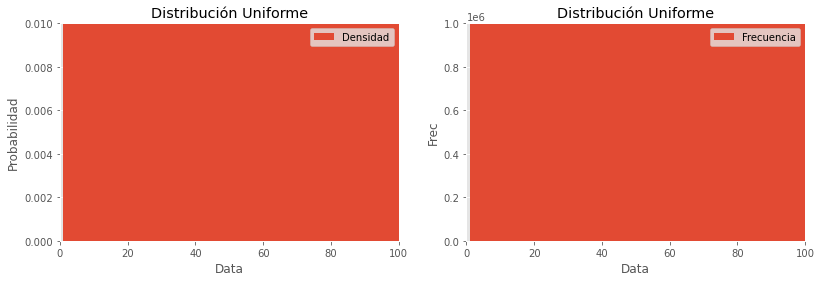

In [3]:
fig, (ax,an) = plt.subplots(1,2)
ax.hist(data,density=True, label = "Densidad")
an.hist(data, label="Frecuencia")
ax.set_title("Distribución Uniforme")
ax.set_xlabel("Data")
ax.set_ylabel("Probabilidad")
an.set_title("Distribución Uniforme")
an.set_xlabel("Data")
an.set_ylabel("Frec")
ax.legend()
an.legend()
ax.axis([0,100,0,.01])
an.axis([0,100,0,1000000])
plt.subplots_adjust(right=1.85)
plt.show()

### Distribución Normal

In [4]:
data = np.random.randn(10000000)

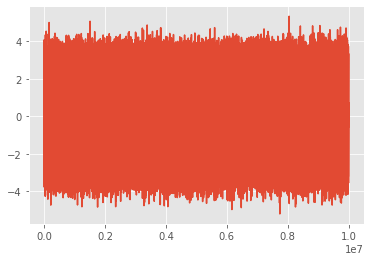

In [5]:
plt.plot(data)
plt.show()

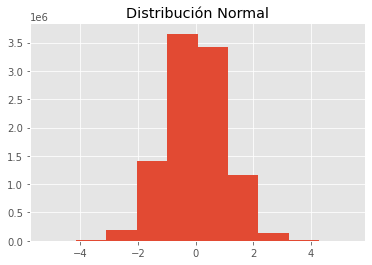

In [6]:
%matplotlib inline
n,bins,patches = plt.hist(data)
plt.title("Distribución Normal")
plt.show()

In [7]:
?plt.hist

In [8]:
n, np.sum(n) # The No. of values that are in each bin. 

(array([1.820000e+02, 9.503000e+03, 1.951940e+05, 1.415545e+06,
        3.656437e+06, 3.417285e+06, 1.159146e+06, 1.405410e+05,
        6.086000e+03, 8.100000e+01]), 10000000.0)

In [9]:
bins # Class Marks

array([-5.20639695, -4.15130125, -3.09620555, -2.04110984, -0.98601414,
        0.06908156,  1.12417727,  2.17927297,  3.23436867,  4.28946437,
        5.34456008])

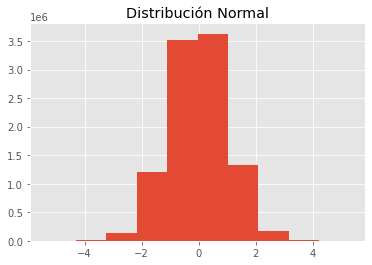

In [10]:
# Otra Manera
data = np.random.normal(loc=0,scale=1,size=10000000)
plt.hist(data)
plt.title("Distribución Normal")
plt.show()

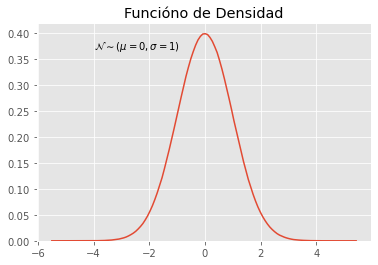

In [11]:
sbn.kdeplot(data)
plt.title("Funcióno de Densidad")
plt.text(-4,0.37,r"$\mathcal{N}\sim (\mu = 0,\sigma = 1)$",fontsize=10)
plt.show()

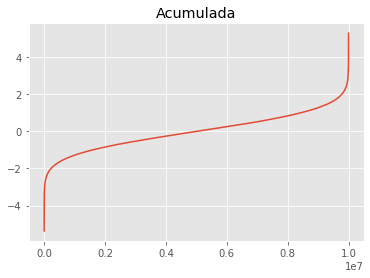

In [12]:
#  Acumulada
plt.plot(sorted(data))
plt.title("Acumulada")
plt.show()

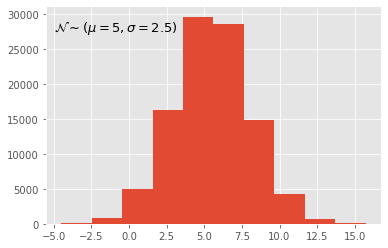

In [13]:
mu = 5.5
sd=2.5
z_data = np.random.randn(100000)
data = mu+sd*z_data
plt.hist(data)
plt.text(-5,27500,r"$\mathcal{N}\sim (\mu = 5,\sigma = 2.5)$",fontsize=13)
plt.show()

## La simulación de Monte Carlo
* Generamos dos números aleatorios uniforme x e y entre 0 y 1 en total 1000 veces.
* Calcularemos x^2 + y^2
    * Si el valor es inferior a 1 -> estamos dentro del círculo.
    * Si el valor es superior a 1 -> estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π. 
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π.

**<center> Asumiendo que el lado del cuadrado mide $2\cdot r$**<br>
$$ P(\text{caer en el círculo}) = \frac{\text{caer dentro del círculo}}{\text{caer dentro del cuadrado}} = \frac{\text{área del círculo}}{\text{área del cuadrado}} = \frac{\pi \cdot r^2}{2\cdot r\cdot 2 \cdot r} = \frac{\pi}{4}$$

**<center> Por lo que si al final se multipla por 4 se obtendrá el área de pi.**

In [14]:
def pi_montecarlo(n_val, n_exp):
    import numpy as np
    pi_avg = 0
    pi_value_list=[]
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n_val)
        y = np.random.uniform(0,1,n_val)
        for j in range(n_val):
            z = np.sqrt(x[j]**2+y[j]**2)
            if z<=1:
                value+=1          
        float_value = float(value)
        pi_value=float_value*4/n_val
        pi_value_list.append(pi_value)
        pi_avg+=pi_value
    pi = pi_avg/n_exp
    print(pi)
    plt.plot(pi_value_list)

3.1418644000000113


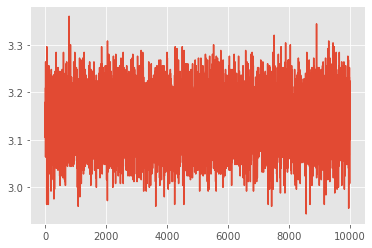

In [15]:
pi_montecarlo(1000,10000)

### Dummy Data Sets

In [16]:
n = 10000000
data = pd.DataFrame({
    "A":np.random.randn(n),
    "B":1.5+2.5*np.random.randn(n),
    "C":np.random.uniform(5,32,n)
},dtype=float)
data.head()

,A,B,C
0,0.844736,5.188857,9.507163
1,-0.786100,2.341234,14.553231
2,-1.340031,0.437380,31.278628
3,1.598911,3.642858,19.584579
4,-1.621053,-1.657892,26.791077


In [17]:
data.describe()

,A,B,C
count,1.000000e+07,1.000000e+07,1.000000e+07
mean,-2.636585e-04,1.499194e+00,1.850087e+01
std,9.999821e-01,2.499150e+00,7.796120e+00
min,-5.376159e+00,-1.184876e+01,5.000003e+00
25%,-6.747010e-01,-1.865848e-01,1.174702e+01
50%,-9.230012e-05,1.499336e+00,1.850441e+01
75%,6.745413e-01,3.184912e+00,2.525404e+01
max,5.867078e+00,1.462696e+01,3.199999e+01


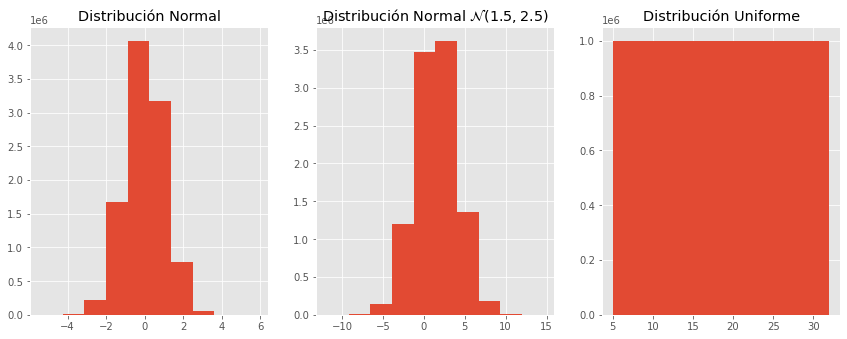

In [18]:
fig,axes=plt.subplots(1,3)
data.A.hist(ax=axes[0])
axes[1].set_title(r"Distribución Normal $\mathcal{N}(1.5,2.5)$")
axes[0].set_title("Distribución Normal")
axes[2].set_title("Distribución Uniforme")
data.B.hist(ax=axes[1])
data.C.hist(ax=axes[2])
plt.subplots_adjust(right=2,bottom=2,top=3)

In [19]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.csv")
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [20]:
columns_values = data.columns.values.tolist()

In [21]:
long = len(columns_values)
long

21

In [22]:
new_data = pd.DataFrame({
    "Column_Name": columns_values,
    "Distr. Normal":np.random.randn(long),
    "Distr. Uniforme 0 y 1": np.random.uniform(0,1,long)
})

In [23]:
new_data.head()

,Column_Name,Distr. Normal,Distr. Uniforme 0 y 1
0,State,0.831937,0.313739
1,Account Length,-0.330609,0.103051
2,Area Code,0.190966,0.055268
3,Phone,-0.208451,0.365930
4,Int'l Plan,1.491195,0.798919


In [24]:
new_data.index= new_data.iloc[:,0]
new_data  = new_data.iloc[:,1:]

In [25]:
new_data

,Distr. Normal,Distr. Uniforme 0 y 1
Column_Name,,
State,0.831937,0.313739
Account Length,-0.330609,0.103051
Area Code,0.190966,0.055268
Phone,-0.208451,0.365930
Int'l Plan,1.491195,0.798919
VMail Plan,0.969740,0.107842
VMail Message,-0.742733,0.927471
Day Mins,-0.998403,0.596958
Day Calls,-2.031696,0.008530
